## 1. Nauka klasyfikatora - kostki

Dokumentacja: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [3]:
from generating_data import generate_checkerboard, generate_data

In [4]:
x, y = generate_checkerboard(n_size=3, n_samples=1000)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import timeit
import time
import pandas as pd

experiment_data = []

n_dimensions_experiments = [2, 3, 4, 6, 8, 10]
n_samples_experiments = [200, 400, 1000, 2000, 4000]

for n_dimensions in n_dimensions_experiments:
    for n_samples in n_samples_experiments:
        X, y, _ = generate_data(n_dimension=n_dimensions, n_samples=n_samples, noise=False)

        # test, train split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

        # parameters
        algorithms = ['ball_tree', 'kd_tree', 'brute']
        leaf_sizes = [2, 30, 100]
        n_neighbors = [3, 7, 9, 27, 65, 99]

        # fitting algorithms and caculating score
        for a in algorithms:
            for l in leaf_sizes:
                for n in n_neighbors:
                    knn = KNeighborsClassifier(n_neighbors=n, leaf_size=l, algorithm=a)
                    time_fit_start = time.time()
                    knn.fit(X_train, y_train)
                    time_fit_end = time.time()
                    time_fit = time_fit_end - time_fit_start

                    time_predict_start = time.time()
                    score = knn.score(X_test, y_test)
                    time_predict_end = time.time()
                    time_predict = time_predict_end - time_fit_start
                    experiment_data.append([n_dimensions, n_samples, n, l, a, score, time_predict, time_predict])
            
df = pd.DataFrame(experiment_data, columns = ['n_dimensions', 'n_samples', 'n_neigbors', 'leaf_size', 'algorithm', 'score', 'time_fit', 'time_predict'])
df = df.set_index(['n_dimensions','n_samples'])
df

n_neigbors  leaf_size  algorithm   score  time_fit  \
n_dimensions n_samples                                                       
2            200                 3          2  ball_tree  0.9300  0.009999   
             200                 7          2  ball_tree  0.9300  0.006000   
             200                 9          2  ball_tree  0.9400  0.007000   
             200                27          2  ball_tree  0.9200  0.007000   
             200                65          2  ball_tree  0.9100  0.006999   
...                            ...        ...        ...     ...       ...   
10           4000                7        100      brute  0.8800  0.374001   
             4000                9        100      brute  0.8920  0.297999   
             4000               27        100      brute  0.9145  0.280001   
             4000               65        100      brute  0.9290  0.383000   
             4000               99        100      brute  0.9365  0.424001   

                        time_predict  
n_dimensions n_samples                
2            200            0.009999  
             200            0.006000  
             200            0.007000  
             200            0.007000  
             200            0.006999  
...                              ...  
10           4000           0.374001  
             4000           0.297999  
             4000           0.280001  
             4000           0.383000  
             4000           0.424001  

[1620 rows x 6 columns]

In [6]:
df.to_csv('experiment_data.csv')

In [7]:
from generating_data import generate_checkerboard
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import timeit
import time
import pandas as pd

experiment_data = []

n_dimensions_experiments = [4, 9, 16, 25]
n_samples_experiments = [200, 400, 1000, 2000, 4000]

for n_dimensions in n_dimensions_experiments:
    for n_samples in n_samples_experiments:
        X, y = generate_checkerboard(n_size=n_dimensions, n_samples=n_samples)

        # test, train split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

        # parameters
        algorithms = ['ball_tree', 'kd_tree', 'brute']
        leaf_sizes = [2, 30, 100]
        n_neighbors = [3, 7, 9, 27, 65, 99]

        # fitting algorithms and caculating score
        for a in algorithms:
            for l in leaf_sizes:
                for n in n_neighbors:
                    knn = KNeighborsClassifier(n_neighbors=n, leaf_size=l, algorithm=a)
                    time_fit_start = time.time()
                    knn.fit(X_train, y_train)
                    time_fit_end = time.time()
                    time_fit = time_fit_end - time_fit_start

                    time_predict_start = time.time()
                    score = knn.score(X_test, y_test)
                    time_predict_end = time.time()
                    time_predict = time_predict_end - time_fit_start
                    experiment_data.append([n_dimensions, n_samples, n, l, a, score, time_predict, time_predict])
            
df = pd.DataFrame(experiment_data, columns = ['n_dimensions', 'n_samples', 'n_neigbors', 'leaf_size', 'algorithm', 'score', 'time_fit', 'time_predict'])
df = df.set_index(['n_dimensions','n_samples'])
df.to_csv('checkerboard_data.csv')

## 2. Interpretacja zebranych danych - kostki

In [8]:
import pandas as pd
df = pd.read_csv('experiment_data.csv')
# df = df.set_index(['n_dimensions','n_samples'])
df['time'] = df['time_fit'] + df['time_predict']

### 2.1 Dla każdego zbioru wyznaczyć optymalna wartość parametru $k$

In [9]:
best_k = df.loc[(df['leaf_size'] == 30) & (df['algorithm'] == 'brute')]
best_k.sort_values('score', ascending=False).drop_duplicates(subset=['n_dimensions', 'n_samples'])

,n_dimensions,n_samples,n_neigbors,leaf_size,algorithm,score,time_fit,time_predict,time
262,2,4000,65,30,brute,0.9965,0.222000,0.222000,0.444000
204,2,2000,3,30,brute,0.9860,0.070000,0.070000,0.140000
479,3,2000,99,30,brute,0.9850,0.087000,0.087000,0.174000
150,2,1000,3,30,brute,0.9840,0.029000,0.029000,0.058000
420,3,1000,3,30,brute,0.9760,0.031003,0.031003,0.062005
531,3,4000,27,30,brute,0.9750,0.231001,0.231001,0.462001
99,2,400,27,30,brute,0.9750,0.012000,0.012000,0.024000
315,3,200,27,30,brute,0.9700,0.005999,0.005999,0.011998
367,3,400,7,30,brute,0.9700,0.010999,0.010999,0.021998
746,4,2000,9,30,brute,0.9680,0.079000,0.079000,0.158000


## 2. Intepretacja zebranych danych - szachownica

In [10]:
import pandas as pd
df = pd.read_csv('checkerboard_data.csv')
df['time'] = df['time_fit'] + df['time_predict']

best_k = df.loc[(df['leaf_size'] == 30) & (df['algorithm'] == 'brute')]
best_k.sort_values('score', ascending=False).drop_duplicates(subset=['n_dimensions', 'n_samples'])

,n_dimensions,n_samples,n_neigbors,leaf_size,algorithm,score,time_fit,time_predict,time
262,4,4000,65,30,brute,0.7710,0.257001,0.257001,0.514001
207,4,2000,27,30,brute,0.7610,0.084002,0.084002,0.168004
153,4,1000,27,30,brute,0.7360,0.034000,0.034000,0.068000
97,4,400,7,30,brute,0.7300,0.014000,0.014000,0.028000
42,4,200,3,30,brute,0.6900,0.006000,0.006000,0.012001
475,9,2000,7,30,brute,0.5820,0.084000,0.084000,0.167999
315,9,200,27,30,brute,0.5700,0.007001,0.007001,0.014001
585,16,200,27,30,brute,0.5600,0.008000,0.008000,0.016000
856,25,200,65,30,brute,0.5500,0.007000,0.007000,0.013999
693,16,1000,27,30,brute,0.5460,0.036000,0.036000,0.072001


## 3. Granica separacji

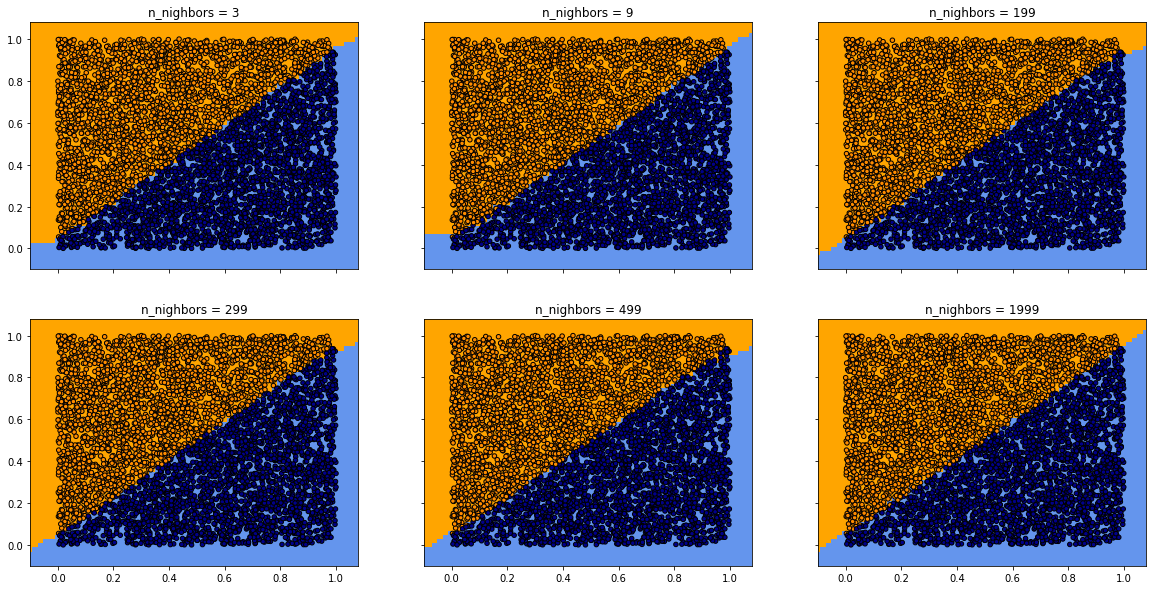

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier


X, y, _ = generate_data(n_dimension=2, n_samples=5000, noise=False)

# parameters
n_neighbors = [3, 9, 199, 299, 499, 1999]

fig, axs = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(20, 10))

for idx, n in enumerate(n_neighbors):
    # fitting algorithms and caculating score
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X, y)

    # Create color maps
    cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
    cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

    # generate points in whole domain
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax = axs.flat[idx]
    
    ax.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

    # Plot also the training points
    ax.scatter(X[:, 0], X[:, 1], c=y,
                edgecolor='k', s=20, cmap=cmap_bold)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(f"n_nighbors = {n}")


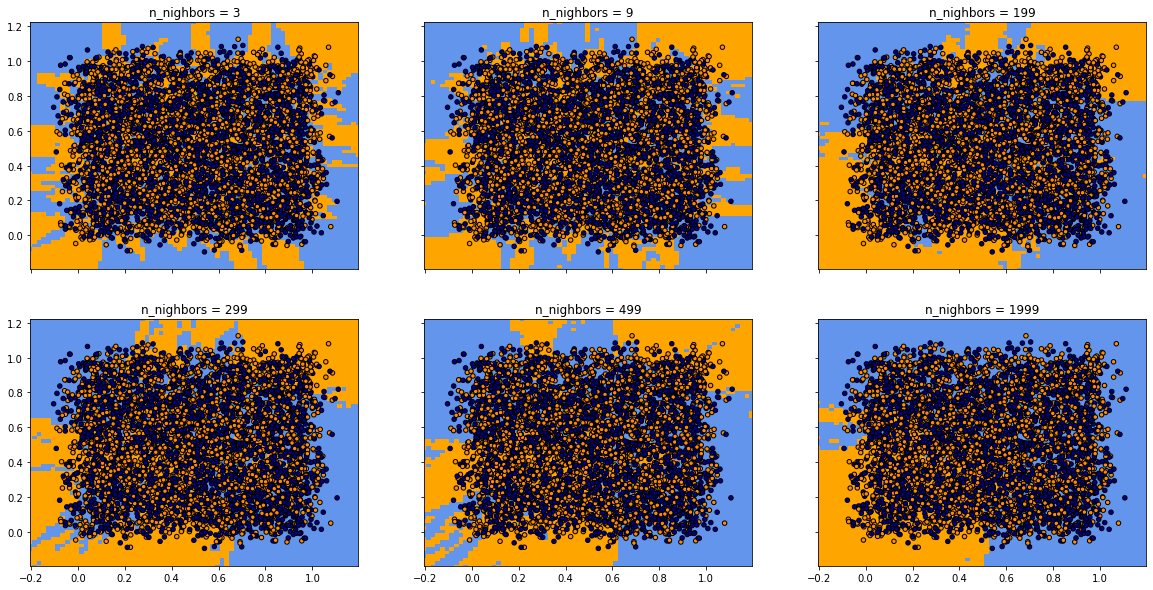

In [12]:
X, y = generate_checkerboard(n_size=10, n_samples=5000)

# parameters
n_neighbors = [3, 9, 199, 299, 499, 1999]

fig, axs = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(20, 10))

for idx, n in enumerate(n_neighbors):
    # fitting algorithms and caculating score
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X, y)

    # # Create color maps
    # cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
    # cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

    # generate points in whole domain
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    
    ax = axs.flat[idx]
    
    ax.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

    # Plot also the training points
    ax.scatter(X[:, 0], X[:, 1], c=y,
                edgecolor='k', s=20, cmap=cmap_bold)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(f"n_nighbors = {n}")

## 4. Złożoność obliczeniowa

In [13]:
import pandas as pd
df = pd.read_csv('experiment_data.csv')
df['time'] = df['time_fit'] + df['time_predict']
df

,n_dimensions,n_samples,n_neigbors,leaf_size,algorithm,score,time_fit,time_predict,time
0,2,200,3,2,ball_tree,0.9300,0.009999,0.009999,0.019997
1,2,200,7,2,ball_tree,0.9300,0.006000,0.006000,0.012000
2,2,200,9,2,ball_tree,0.9400,0.007000,0.007000,0.013999
3,2,200,27,2,ball_tree,0.9200,0.007000,0.007000,0.014001
4,2,200,65,2,ball_tree,0.9100,0.006999,0.006999,0.013998
...,...,...,...,...,...,...,...,...,...
1615,10,4000,7,100,brute,0.8800,0.374001,0.374001,0.748003
1616,10,4000,9,100,brute,0.8920,0.297999,0.297999,0.595997
1617,10,4000,27,100,brute,0.9145,0.280001,0.280001,0.560001
1618,10,4000,65,100,brute,0.9290,0.383000,0.383000,0.766000


Text(0, 0.5, 'time')

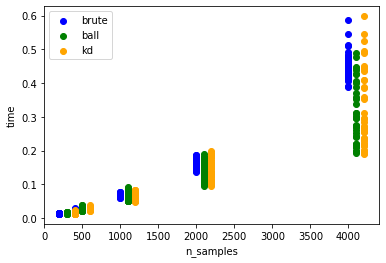

In [14]:
import matplotlib.pyplot as plt
brute = df.loc[(df['leaf_size'] == 30) & (df['algorithm'] == 'brute')]
ball = df.loc[(df['leaf_size'] == 30) & (df['algorithm'] == 'ball_tree')]
kd = df.loc[(df['leaf_size'] == 30) & (df['algorithm'] == 'kd_tree')]

plt.scatter(brute['n_samples'], brute['time'], color='blue', label='brute')
plt.scatter(ball['n_samples']+100, ball['time'], color='green', label='ball')
plt.scatter(kd['n_samples']+200, kd['time'], color='orange', label='kd')
plt.legend()
plt.xlabel('n_samples')
plt.ylabel('time')

## 5. Granica separacji z szumem

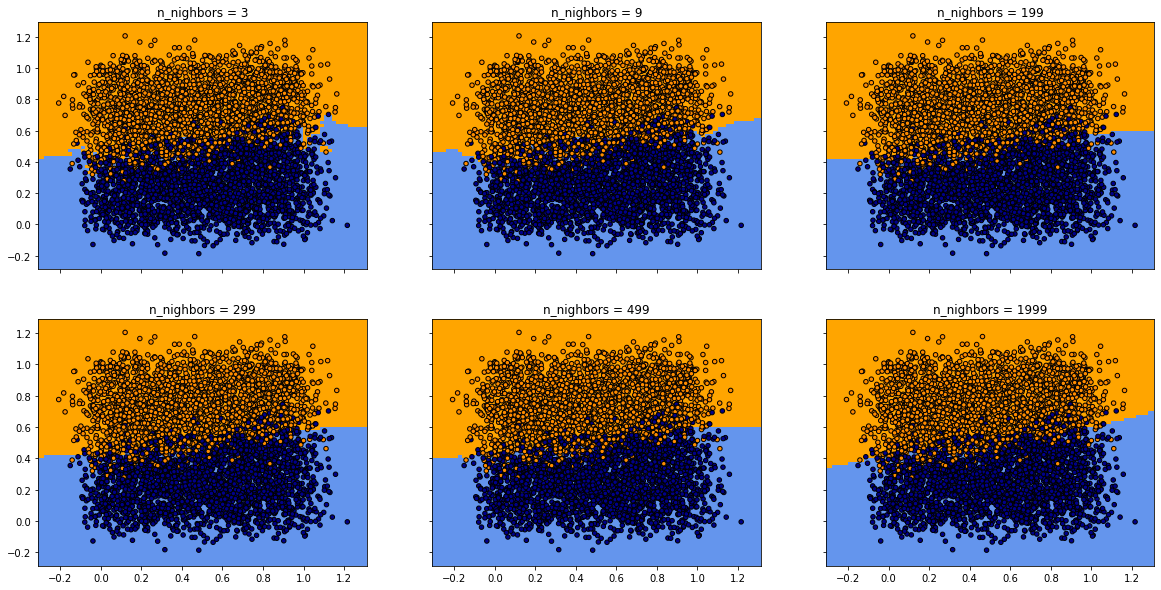

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from generating_data import generate_checkerboard, generate_data


X, y, _ = generate_data(n_dimension=2, n_samples=5000, noise=True)

# parameters
n_neighbors = [3, 9, 199, 299, 499, 1999]

fig, axs = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(20, 10))

for idx, n in enumerate(n_neighbors):
    # fitting algorithms and caculating score
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X, y)

    # Create color maps
    cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
    cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

    # generate points in whole domain
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax = axs.flat[idx]
    
    ax.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

    # Plot also the training points
    ax.scatter(X[:, 0], X[:, 1], c=y,
                edgecolor='k', s=20, cmap=cmap_bold)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(f"n_nighbors = {n}")


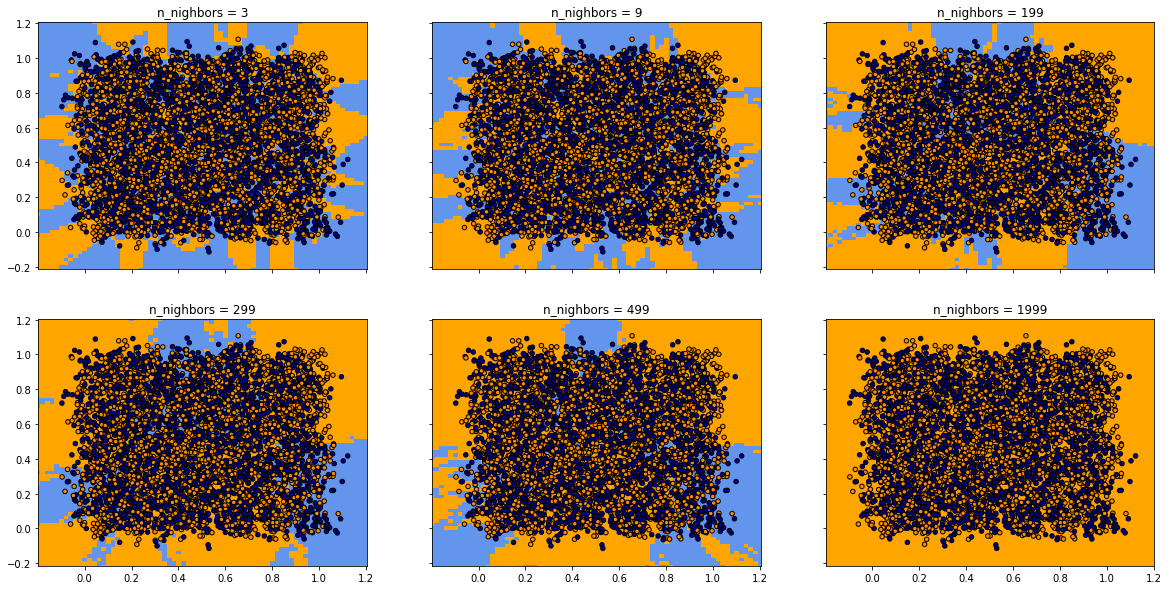

In [16]:
X, y = generate_checkerboard(n_size=10, n_samples=5000, noise=True)

# parameters
n_neighbors = [3, 9, 199, 299, 499, 1999]

fig, axs = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(20, 10))

for idx, n in enumerate(n_neighbors):
    # fitting algorithms and caculating score
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X, y)

    # # Create color maps
    # cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
    # cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

    # generate points in whole domain
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    
    ax = axs.flat[idx]
    
    ax.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

    # Plot also the training points
    ax.scatter(X[:, 0], X[:, 1], c=y,
                edgecolor='k', s=20, cmap=cmap_bold)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(f"n_nighbors = {n}")